<a href="https://colab.research.google.com/github/sushree-akankshya-panda/Machine-Learning/blob/machine-learning/training_in_winedataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training with SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


SGD Final Test Accuracy: 0.7437

Training with Mini-batch SGD
Mini-batch SGD Final Test Accuracy: 0.7375

Training with Momentum
Momentum Final Test Accuracy: 0.7812

Training with AdaGrad
AdaGrad Final Test Accuracy: 0.7500

Training with RMSprop
RMSprop Final Test Accuracy: 0.7781

Training with Adam
Adam Final Test Accuracy: 0.7969



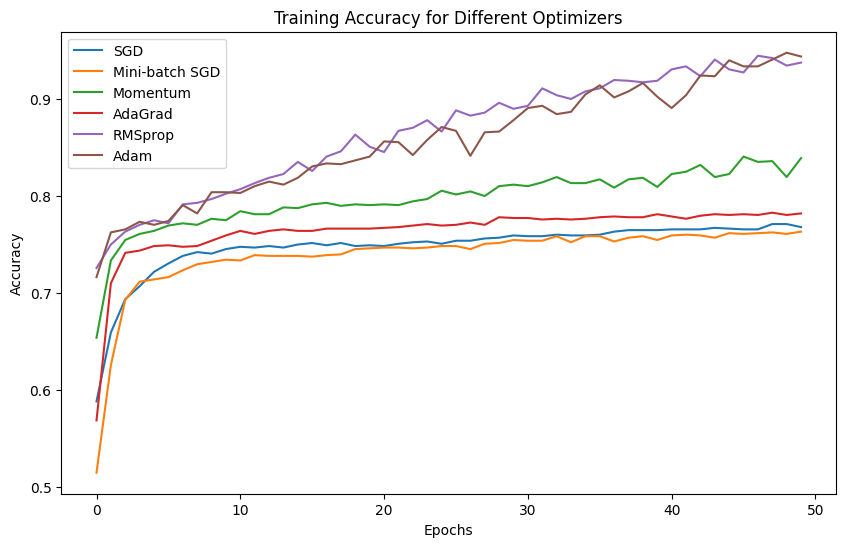


Final Validation Accuracies:
SGD:0.7437
Mini-batch SGD:0.7375
Momentum:0.7812
AdaGrad:0.7500
RMSprop:0.7781
Adam:0.7969


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
# Load dataset
url ="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
# Split into features and target
X = df.drop("quality", axis=1).values
y = df["quality"].values
# Convert quality into binary classification (Good=1 if quality >= 6, elseBad=0)
y = (y >= 6).astype(int)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#defining build_model for adding more number of hidden layer
def build_model():
  model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])
  return model

#Defining the optimizers in the form of dictionary
optimizers = {
  "SGD": SGD(learning_rate=0.01),
  "Mini-batch SGD": SGD(learning_rate=0.01),
  "Momentum": SGD(learning_rate=0.01, momentum=0.9),
  "AdaGrad": Adagrad(learning_rate=0.01),
  "RMSprop": RMSprop(learning_rate=0.01),
  "Adam": Adam(learning_rate=0.01)
}
#A empty dictionary for storing the hostory of the model
history_dict = {}
# Train and evaluate models with different optimizers
for opt_name, optimizer in optimizers.items():
  print(f"Training with {opt_name}")
  model=build_model()
  model.compile(optimizer=optimizer, loss='binary_crossentropy',
  metrics=['accuracy'])
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
  epochs=50, batch_size=32, verbose=0)
  history_dict[opt_name] = history
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
  print(f"{opt_name} Final Test Accuracy: {test_acc:.4f}\n")

# Plot training accuracy for each optimizer
plt.figure(figsize=(10, 6))
for opt_name, history in history_dict.items():
  plt.plot(history.history['accuracy'], label=f'{opt_name}')
plt.title('Training Accuracy for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Compare final accuracy of all optimizers
final_accuracies = {opt: history.history['val_accuracy'][-1] for opt,
history in history_dict.items()}

print("\nFinal Validation Accuracies:")
for opt, acc in final_accuracies.items():
  print(f"{opt}:{acc:.4f}")